# Chapter 6: Decision Trees

In [2]:
# import libraries
import pandas as pd
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

# Growing a random forest from decision trees

## Training decision tree on make moons data

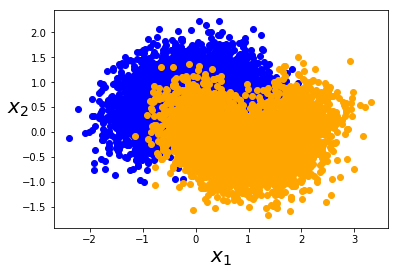

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise = 0.4, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

plt.scatter(X_train[(y_train==0),0],X_train[(y_train==0),1], c = 'blue')
plt.scatter(X_train[(y_train==1),0],X_train[(y_train==1),1], c = 'orange')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show();

# Cross validation and hyperparameter tuning

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': [1, 2, 3, 4], 'max_leaf_nodes': [2, 3, 4, 5, 6]}]

grid_search = GridSearchCV(tree_clf, param_grid, cv=3, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_
final_model = grid_search.best_estimator_

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4], 'max_leaf_nodes': [2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

{'max_depth': 1, 'max_leaf_nodes': 4}

In [6]:
from sklearn.metrics import accuracy_score

test_pred = final_model.predict(X_train)

print("Overall accuracy:" + str(accuracy_score(y_train, test_pred)))

Overall accuracy:0.8555


## Building the random forest from decision trees

Continuing the previous exercise, generate 1,000 subsets of the training set,
each containing 100 instances selected randomly. Hint: you can use Scikit-
Learn’s ShuffleSplit class for this.

In [7]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits = 1000, train_size = .01, test_size = None, random_state = 42)

Train one Decision Tree on each subset, using the best hyperparameter values
found above. Evaluate these 1,000 Decision Trees on the test set. Since they
were trained on smaller sets, these Decision Trees will likely perform worse
than the first Decision Tree, achieving only about 80% accuracy.

In [8]:
tree_clf = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=4)

scores = []
for train_index in rs.split(X_train):
    clf = tree_clf.fit(X_train[train_index[0]], y_train[train_index[0]])
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

In [9]:
scores = np.array(scores)
print("Mean Accuracy = " + str(np.mean(scores)))

Mean Accuracy = 0.8264705


Now comes the magic. For each test set instance, generate the predictions of
the 1,000 Decision Trees, and keep only the most frequent prediction (you can
use SciPy’s mode() function for this). This gives you majority-vote predictions
over the test set.

In [10]:
predictions = []
for train_index in rs.split(X_train):
    clf = tree_clf.fit(X_train[train_index[0]], y_train[train_index[0]])
    predictions.append(clf.predict(X_test))
np_predictions = np.array(predictions)

In [11]:
from scipy import stats
final_pred = stats.mode(np_predictions)[0]
final_pred = final_pred.reshape(len(y_test), )
print("Overall Accuracy = " + str(accuracy_score(y_test, final_pred)))

Overall Accuracy = 0.868
